# Final Project - Stephen Fortin

This is my final project for the class *Introduction to Machine Learning: Supervised Learning*. The dataset used in this project is available from the UCI Machine Learning Repository (link: https://archive.ics.uci.edu/).

The dataset is titled *Adult*, and is also known as the *Census Income* dataset. The dataset contains select census information as well as income level information (i.e., less than or equal to 50k per year versus greater than 50k per year of income).

A listing of the attributes of the dataset are as follows:

age: continuous. <br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. <br>
fnlwgt: continuous. <br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>
education-num: continuous. <br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>
sex: Female, Male. <br>
capital-gain: continuous. <br>
capital-loss: continuous. <br>
hours-per-week: continuous. <br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. <br>

Source: https://archive.ics.uci.edu/dataset/2/adult <br>
Citation: Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

### Github

The link to the github repository for this project is as follows: https://github.com/sfortin1/FinalProject_SupervisedLearning/tree/main.

# Project Summary

## Objective
The objective of this project is to develop a model to predict the income level of a person based on census information. This model could assist companies in determining the income level of existing or new customers in order to better serve them using information that may be routinely gathered from customers.

## Model
The main model will be determined by comparing the performance of the following types of models: Logistic Regression, k-Nearest Neighbords (kNN), and Random Forest. Due to the size of the dataset and memory constraints, Support Vector Machines were not used.

## Import Dependencies

Pip install ucimlrepo if needed.

In [1]:
%pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


Import required libraries

In [56]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

Import the dataset cited above.

In [2]:
# fetch dataset 
Data = fetch_ucirepo(id=2) 
  
# Data (as pandas dataframes) 
X = Data.data.features 
y = Data.data.targets 

Explore the data

In [3]:
print(X.head())
print(y.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

In [4]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Co

In [5]:
print(X.describe())
print(y.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
       income
count   48842
unique      4
top     <=50K
freq   

The dataset is comprised of 14 features and 48,842 rows. The meaning of the fnlwgt column is not defined, but seems to be associated to the weight of an observation in the census data. This weight is likely not meaningful to our analyses and can be excluded. Education and education-num are redundant, and education-num will be excluded from our model.

In [6]:
print(y['income'].unique())
print(y['income'].isnull().sum())

['<=50K' '>50K' '<=50K.' '>50K.']
0


Some data cleaning will be needed for the dependent variable.

In [7]:
print("Number of unknown rows for feature")
for x in X.columns:
    print( x + ": " + str(X[x].isnull().sum()) )

print("")
print("Unique value of features")
print("workclass: " + str(X['workclass'].unique()))
print("education: " + str(X['education'].unique()))
print("marital-status: " + str(X['marital-status'].unique()))
print("occupation: " + str(X['occupation'].unique()))
print("relationship: " + str(X['relationship'].unique()))
print("race: " + str(X['race'].unique()))
print("sex: " + str(X['sex'].unique()))
print("native-country: " + str(X['native-country'].unique()))

Number of unknown rows for feature
age: 0
workclass: 963
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 966
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 274

Unique value of features
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
relationship: ['Not-in-family' 'Husba

## Data Cleaning (First Pass)

Clean the dependent (y) variable. Set income greater than 50k to 1 and less than or equal to 50k to 0

In [8]:
y = y.replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})
print(y['income'].unique())

[0 1]


Drop redundant or unnecessary feature columns (X). 

In [9]:
X = X.drop(columns=['fnlwgt', 'education-num'])
print(X.columns)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')


Then clean feature columns (X); defining '?' and NaN values as 'Unknown'.

In [10]:
X['workclass'] = X['workclass'].replace({'?': 'Unknown'}).fillna('Unknown')
X['occupation'] = X['occupation'].replace({'?': 'Unknown'}).fillna('Unknown')
X['native-country'] = X['native-country'].replace({'?': 'Unknown'}).fillna('Unknown')

print("Unique value of features")
print("workclass: " + str(X['workclass'].unique()))
print("occupation: " + str(X['occupation'].unique()))
print("native-country: " + str(X['native-country'].unique()))

Unique value of features
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Unknown' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


After data cleaning, the data contains 12 features and no null values.

## Data Visualization

Combine the X and y dataframes.

In [11]:
df = pd.concat([X, y], axis=1)
print(df.columns)
print(df.shape)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')
(48842, 13)


### Income

There is a good proportion of patients in each income category in the dataset.

<Axes: ylabel='income'>

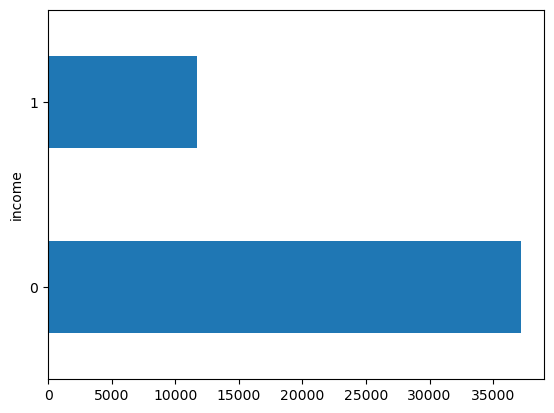

In [12]:
df['income'].value_counts().plot(kind='barh')

### Age

As expected, a higher proportion of older invididuals are in the higher income category.

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

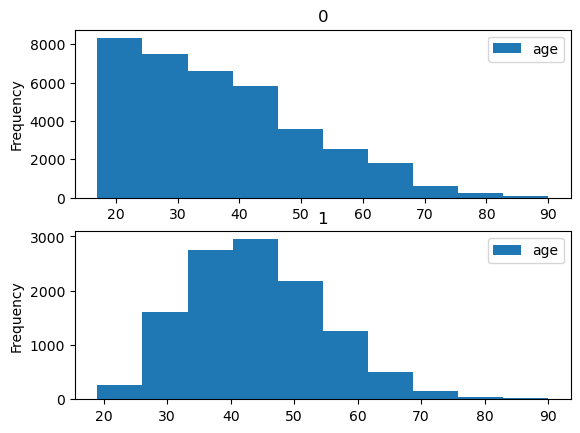

In [13]:
df.plot.hist(column=["age"], by="income")

### Workclass

The never-worked category has no observations with higher income, which may pose an issue during modeling. This category should be removed.

income                  0       1
workclass                        
Federal-gov         871.0   561.0
Local-gov          2209.0   927.0
Never-worked         10.0     NaN
Private           26519.0  7387.0
Self-emp-inc        757.0   938.0
Self-emp-not-inc   2785.0  1077.0
State-gov          1451.0   530.0
Unknown            2534.0   265.0
Without-pay          19.0     2.0


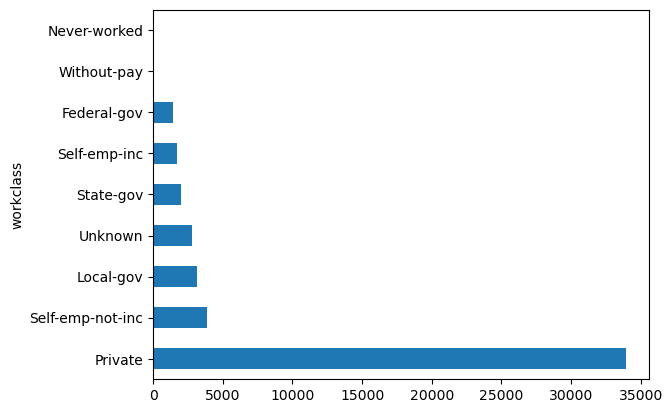

In [33]:
df['workclass'].value_counts().plot(kind='barh')
print(df.groupby(['workclass', 'income']).size().unstack())

### Education

There are individuals within each category of education for both income levels. We may consider combining some of these categories (feature engineering).

income            0     1
education                
10th           1302    87
11th           1720    92
12th            609    48
1st-4th         239     8
5th-6th         482    27
7th-8th         893    62
9th             715    41
Assoc-acdm     1188   413
Assoc-voc      1539   522
Bachelors      4712  3313
Doctorate       163   431
HS-grad       13281  2503
Masters        1198  1459
Preschool        82     1
Prof-school     217   617
Some-college   8815  2063


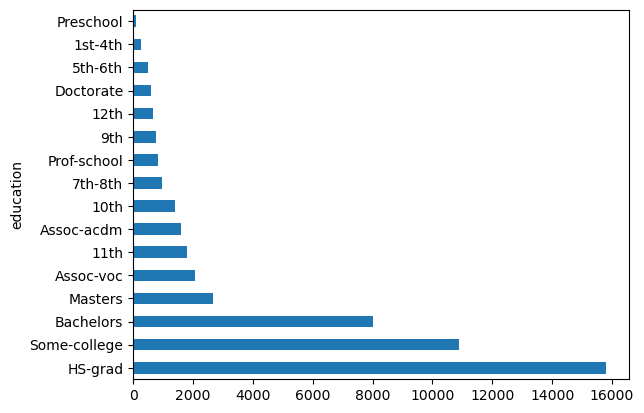

In [14]:
df['education'].value_counts().plot(kind='barh')
print(df.groupby(['education', 'income']).size().unstack())

### Marital Status

There are individuals within each category of marital status for both income levels. We may consider combining some of these categories (feature engineering).

income                     0     1
marital-status                    
Divorced                5962   671
Married-AF-spouse         23    14
Married-civ-spouse     12395  9984
Married-spouse-absent    570    58
Never-married          15384   733
Separated               1431    99
Widowed                 1390   128


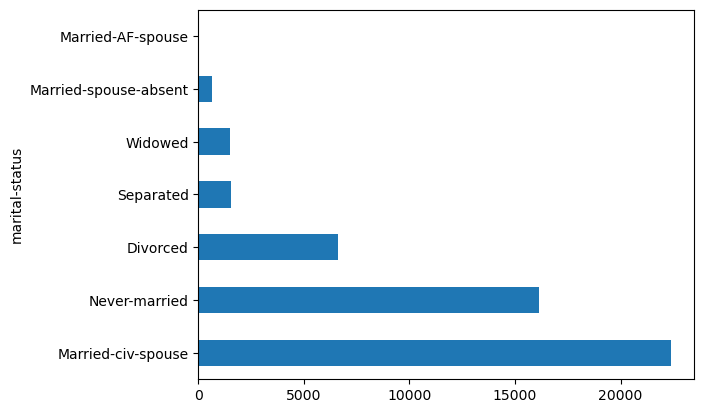

In [32]:
df['marital-status'].value_counts().plot(kind='barh')
print(df.groupby(['marital-status', 'income']).size().unstack())

### Occupation

There are individuals within each category of occupation for both income levels.

income                0     1
occupation                   
Adm-clerical       4843   768
Armed-Forces         10     5
Craft-repair       4729  1383
Exec-managerial    3178  2908
Farming-fishing    1317   173
Handlers-cleaners  1934   138
Machine-op-inspct  2650   372
Other-service      4719   204
Priv-house-serv     239     3
Prof-specialty     3388  2784
Protective-serv     675   308
Sales              4029  1475
Tech-support       1026   420
Transport-moving   1874   481
Unknown            2544   265


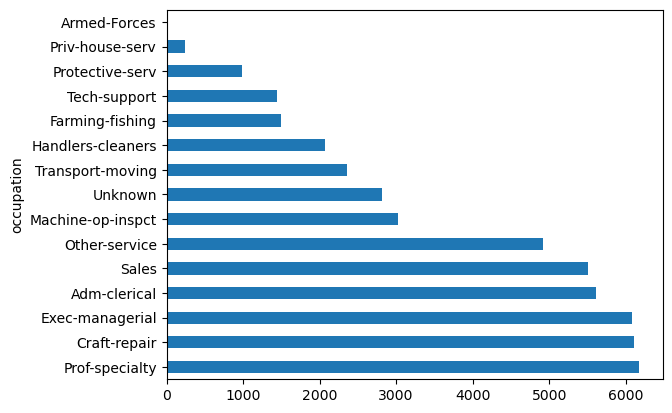

In [15]:
df['occupation'].value_counts().plot(kind='barh')
print(df.groupby(['occupation', 'income']).size().unstack())

### Relationship

There are individuals within each category of relationship for both income levels.

income              0     1
relationship               
Husband         10870  8846
Not-in-family   11307  1276
Other-relative   1454    52
Own-child        7470   111
Unmarried        4816   309
Wife             1238  1093


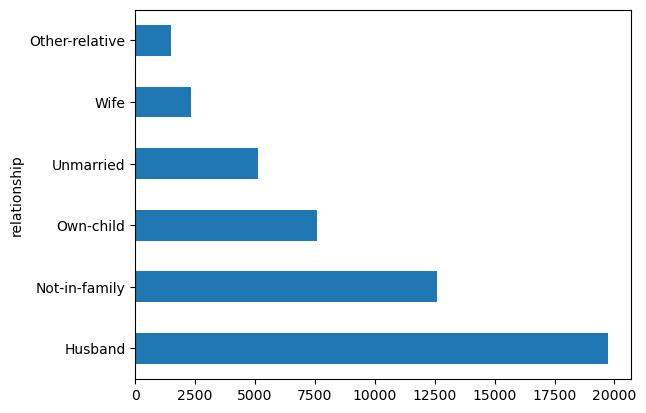

In [31]:
df['relationship'].value_counts().plot(kind='barh')
print(df.groupby(['relationship', 'income']).size().unstack())

### Race

There are individuals within each category of race for both income levels. Consider combining categories (feature engineering).

income                  0      1
race                            
Amer-Indian-Eskimo    415     55
Asian-Pac-Islander   1110    409
Black                4119    566
Other                 356     50
White               31155  10607


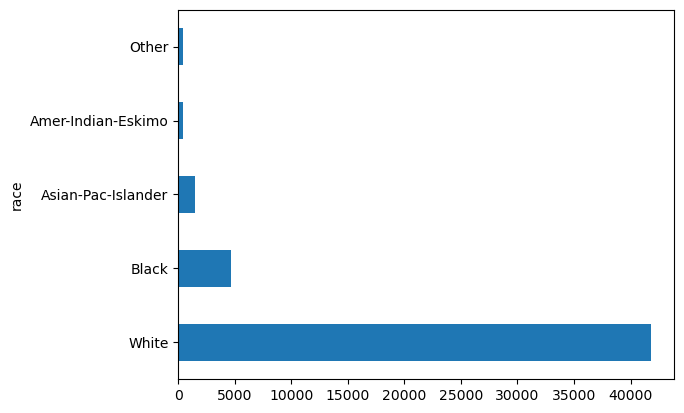

In [16]:
df['race'].value_counts().plot(kind='barh')
print(df.groupby(['race', 'income']).size().unstack())

### Sex

There are individuals within each category of sex for both income levels.

income      0     1
sex                
Female  14423  1769
Male    22732  9918


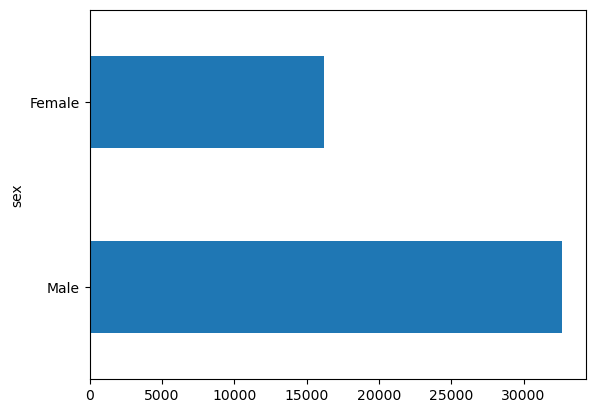

In [30]:
df['sex'].value_counts().plot(kind='barh')
print(df.groupby(['sex', 'income']).size().unstack())

### Capital Gain

Capital gain is not normally distributed. Most individuals have 0 capital gain. Will convert to a binary variable during the second pass of data cleaning.

44807


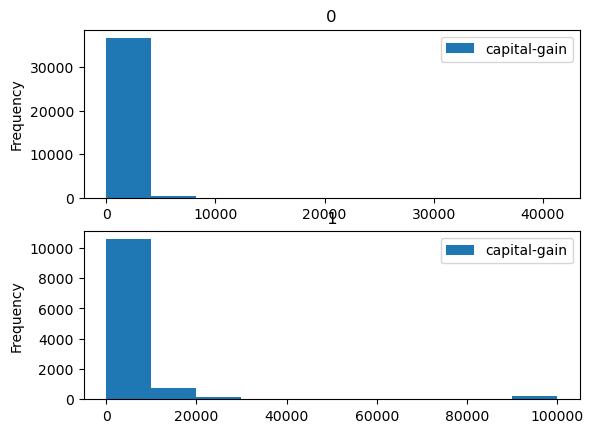

In [17]:
df.plot.hist(column=["capital-gain"], by="income")
print(sum(df['capital-gain'] == 0))

### Capital Loss

Capital loss is not normally distributed. Most individuals have 0 capital gain. Will convert to a binary variable during the second pass of data cleaning.

46560


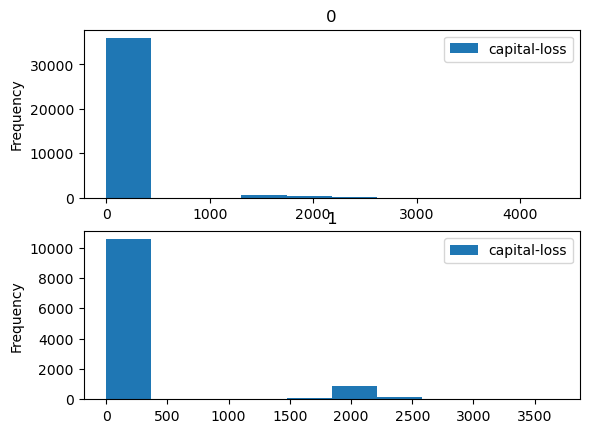

In [29]:
df.plot.hist(column=["capital-loss"], by="income")
print(sum(df['capital-loss'] == 0))

### Native Country

The category of Holand-Netherlands has few observations, and no observations in the higher income category. There is also a significant number of categories for this variable. Will combine categories during the second pass of data cleaning.

income                            0        1
native-country                              
Cambodia                       19.0      9.0
Canada                        119.0     63.0
China                          86.0     36.0
Columbia                       81.0      4.0
Cuba                          104.0     34.0
Dominican-Republic             98.0      5.0
Ecuador                        39.0      6.0
El-Salvador                   144.0     11.0
England                        80.0     47.0
France                         22.0     16.0
Germany                       148.0     58.0
Greece                         31.0     18.0
Guatemala                      85.0      3.0
Haiti                          66.0      9.0
Holand-Netherlands              1.0      NaN
Honduras                       18.0      2.0
Hong                           22.0      8.0
Hungary                        13.0      6.0
India                          89.0     62.0
Iran                           37.0     22.0
Ireland   

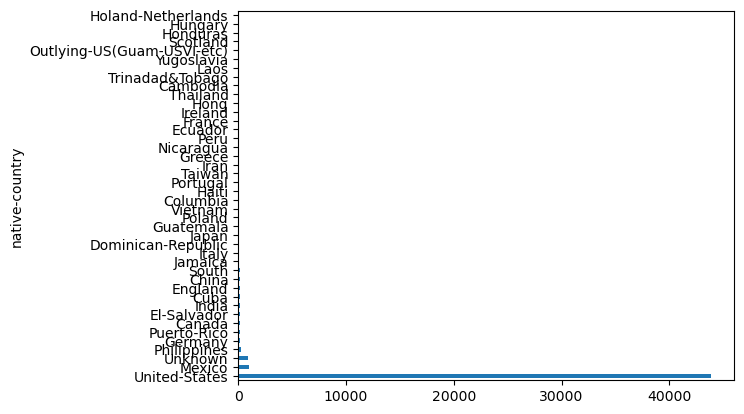

In [18]:
df['native-country'].value_counts().plot(kind='barh')
print(df.groupby(['native-country', 'income']).size().unstack())

### Hours per week

As expeted, a higher average hours per week worked is observed among the higher income group as shown in the histogram.

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

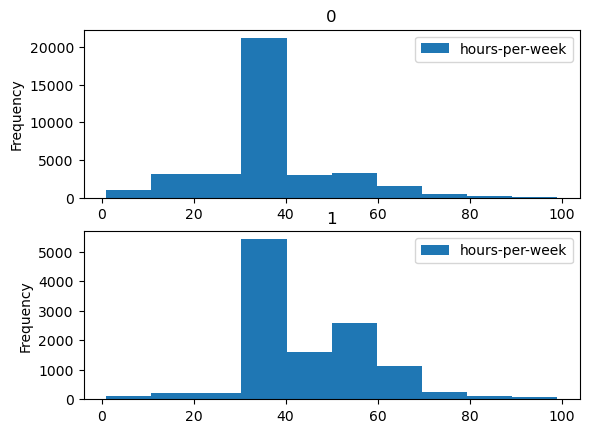

In [34]:
df.plot.hist(column=["hours-per-week"], by="income")

## Data Cleaning (Second Pass)

Based on the findings of data visualization, additional data cleaning will now be performed.

In [19]:
X1 = X.copy()
y1 = y.copy()

# Make capital-gain/loss binary variables (1 means the value is greater than 0)
X1['capital-gain'][X1['capital-gain'] > 0] = 1
X1['capital-loss'][X1['capital-loss'] > 0] = 1

# Combine native-country into native-region -- include United States as its own category
# Source: https://statisticstimes.com/geography/countries-by-continents.php
X1['native-region'] = X1['native-country'].replace({
    "Cambodia": "SouthEastAsia",
    "Canada": "NorthAmericaNonUS",
    "China": "EasternAsia",
    "Columbia": "LatinAmerica",
    "Cuba": "LatinAmerica",
    "Dominican-Republic": "LatinAmerica",
    "Ecuador": "LatinAmerica",
    "El-Salvador": "LatinAmerica",
    "England": 'Europe',#'WesternEurope',
    "France": 'Europe',#"WesternEurope",
    "Germany": 'Europe',#"WesternEurope",
    "Greece": 'Europe',#"SouthEastEurope",
    "Guatemala": "LatinAmerica",
    "Haiti": "LatinAmerica",
    "Holand-Netherlands": 'Europe',#"WesternEurope",
    "Honduras": "LatinAmerica",
    "Hong": "EasternAsia",
    "Hungary": 'Europe',#"EasternEurope",
    "India": "SouthernAsia",
    "Iran": "SouthernAsia",
    "Ireland": 'Europe',#"NorthernEurope",
    "Italy": 'Europe',#'SouthernEurope',
    "Jamaica": "LatinAmerica",
    "Japan": "EasternAsia",
    "Laos": 'SouthEastAsia',
    "Mexico": "LatinAmerica",
    "Nicaragua": "LatinAmerica",
    "Outlying-US(Guam-USVI-etc)": 'NorthAmericaNonUS',
    "Peru": "LatinAmerica",
    "Philippines": "SouthEastAsia",
    "Poland": 'Europe',#"NorthernEurope",
    "Portugal": 'Europe',#"SouthernEurope",
    "Puerto-Rico": "LatinAmerica",
    "Scotland": 'Europe',#'NorthwestEurope',
    "South": 'Unknown',
    "Taiwan": "EasternAsia",
    "Thailand": "SouthEastAsia",
    "Trinadad&Tobago": "LatinAmerica",
    "United-States": 'UnitedStates',
    "Unknown": 'Unknown',
    "Vietnam": "SouthEastAsia",
    "Yugoslavia": 'Europe',#'CentralEurope'
})
X1 = X1.drop(columns=['native-country'])

# Remove the never-worked category
indx = X['workclass'] != 'Never-worked'
y1 = y1.loc[indx]
X1 = X1.loc[indx]

# Rename columns
X1 = X1.rename(columns = {"marital-status": "maritalStatus",
                     "capital-gain": "capitalGain",
                     "capital-loss": "capitalLoss",
                     "hours-per-week": 'hoursPerWeek',
                     "native-region": 'nativeRegion'})


C:\Users\steph\AppData\Local\Temp\ipykernel_5840\1499280104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['capital-gain'][X1['capital-gain'] > 0] = 1
C:\Users\steph\AppData\Local\Temp\ipykernel_5840\1499280104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['capital-loss'][X1['capital-loss'] > 0] = 1


### Data Visualization: Native-region

The majority of individuals are from the United States. There are now observations in both income categories across all native regions.

income                 0      1
nativeRegion                   
EasternAsia          207    102
Europe               550    230
LatinAmerica        1907    165
NorthAmericaNonUS    141     64
SouthEastAsia        354    108
SouthernAsia         126     84
UnitedStates       33128  10694
Unknown              732    240


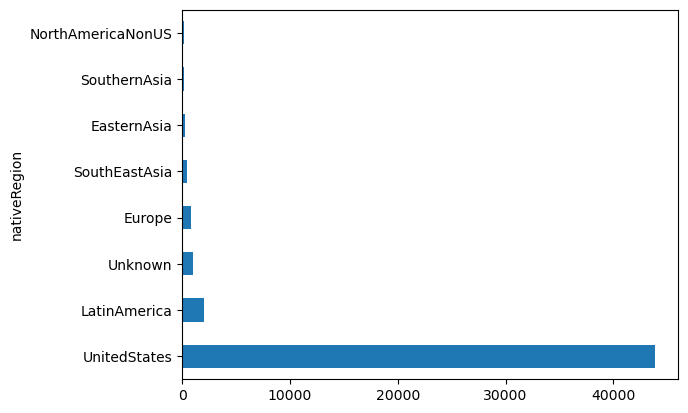

In [22]:
df1 = pd.concat([X1, y1], axis=1)
df1['nativeRegion'].value_counts().plot(kind='barh')
print(df1.groupby(['nativeRegion', 'income']).size().unstack())

### Transform Categorical Variables to Integers Using LabelEncoder

For each categorical variable, label encoder was used to transform it to an integer.

In [23]:
dtypes = df1.dtypes
for x in df1.columns:
    if dtypes[x] == object:
        print("Feature:", x)
        print("String categories:", df1[x].unique())
        label_encoder = preprocessing.LabelEncoder()
        label_encoder.fit(df1[x].unique())
        df1[x] = label_encoder.transform(df1[x])
        print("Int categories:", df1[x].unique())

Feature: workclass
String categories: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay']
Int categories: [5 4 2 0 1 6 3 7]
Feature: education
String categories: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Int categories: [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
Feature: maritalStatus
String categories: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Int categories: [4 2 0 3 5 1 6]
Feature: occupation
String categories: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Int categories: [ 0  3  5  9  7 11  2 13  4  6 12 14 10  1  8]
Feat

## Correlation Between Variables

Testing the correlation between variables.

<Axes: >

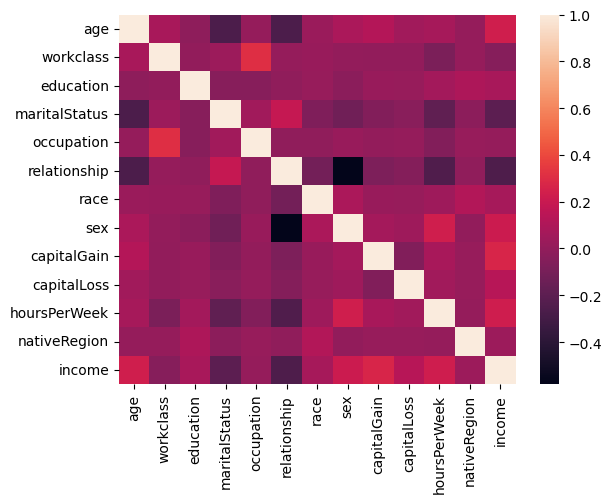

In [24]:
sns.heatmap(df1.corr())

Looking at the correlations for certain variables such as sex/relationship and workclass/occupation based on the heatmap. There is some modestly strong correlation between sex and relationship.

In [35]:
print(df1.corr()['workclass'].sort_values(ascending=False))
print(df1.corr()['sex'].sort_values(ascending=False))

workclass        1.000000
occupation       0.307308
age              0.076572
maritalStatus    0.033499
race             0.020562
nativeRegion     0.012205
relationship     0.008642
sex              0.004722
education       -0.002224
capitalGain     -0.002515
capitalLoss     -0.004735
income          -0.046467
hoursPerWeek    -0.083722
Name: workclass, dtype: float64
sex              1.000000
hoursPerWeek     0.228580
income           0.214664
age              0.088182
race             0.086645
capitalGain      0.063152
capitalLoss      0.041744
occupation       0.021851
workclass        0.004722
nativeRegion    -0.004245
education       -0.027094
maritalStatus   -0.127507
relationship    -0.579873
Name: sex, dtype: float64


Looking at the correlation between features (X) and income (y). The correlation between income category and individual features appears weak.

In [36]:
print(df1.corr()['income'].sort_values(ascending=False))

income           1.000000
capitalGain      0.265896
age              0.230266
hoursPerWeek     0.227631
sex              0.214664
capitalLoss      0.135949
education        0.079996
race             0.070909
nativeRegion     0.036541
occupation       0.007478
workclass       -0.046467
maritalStatus   -0.199045
relationship    -0.253148
Name: income, dtype: float64


## Modeling

Split the data into a training and test set, and apply feature scaling using StandardScaler

In [37]:
# Split into training and test sets
X1_1 = df1.iloc[:, :-1].values
y1_1 = df1.iloc[:, -1].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_1, y1_1, train_size=0.8)

# Feature scaling
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

### Logistic Regression

First, investigate which features to add through backward elimination. It seems that all features are important, and none are removed.

In [38]:
f = 'income ~ age + workclass + education + maritalStatus + occupation + \
relationship + race + sex + capitalGain + capitalLoss + \
hoursPerWeek + nativeRegion'
model = smf.ols(formula = f, data=df1)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1066.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:25:16   Log-Likelihood:                -22018.
No. Observations:               48832   AIC:                         4.406e+04
Df Residuals:                   48819   BIC:                         4.418e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2434      0.016    -14.991

Train and fit the logistic regression model using LogisticRegression from scikitlearn.

In [39]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X1_train, y1_train)

LogisticRegression(random_state=0)

Predict income level on the test set data

In [40]:
y_pred = classifier.predict(X1_test)

Assess model performance on the training set. Although the accuracy is fair (approx. 79.0%), the F1-score is low (approx. 40.6%).

In [41]:
cm = confusion_matrix(y1_test, y_pred)
TP = sum( np.logical_and(y_pred == 1, y1_test == 1) )
TN = sum( np.logical_and(y_pred == 0, y1_test == 0) )
FP = sum( np.logical_and(y_pred == 1, y1_test == 0) )
FN = sum( np.logical_and(y_pred == 0, y1_test == 1) )

print(cm)
print("Numer of TP: " + str(TP))
print("Numer of TN: " + str(TN))
print("Numer of FP: " + str(FP))
print("Numer of FN: " + str(FN))

[[7043  410]
 [1584  730]]
Numer of TP: 730
Numer of TN: 7043
Numer of FP: 410
Numer of FN: 1584


In [194]:
acc_score = accuracy_score(y_true = y1_test, y_pred = y_pred)
f_score = f1_score(y_true=y1_test, y_pred=y_pred)

print("Accuracy score: " + str(acc_score))
print("F1 score: " + str(f_score))

Accuracy score: 0.7901095525749975
F1 score: 0.40614136732329087


## K-Nearest Neighbors

Use grid search to create kNN models with different number of neighbors. Then, fit the models on the previously defined training set.

In [60]:
param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 50]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), \
                    param_grid = param_grid, \
                    scoring = "accuracy")

grid_search_knn.fit(X1_train, y1_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 50]},
             scoring='accuracy')

In [61]:
print("Best Estimator values:", grid_search_knn.best_estimator_)
print('Best Score:', np.abs(grid_search_knn.best_score_))

Best Estimator values: KNeighborsClassifier(n_neighbors=20)
Best Score: 0.8261615256623577


Train the model using the parameter settings resulting the best score identified from the grid search.

In [49]:
model_knn = KNeighborsClassifier(n_neighbors=20)
model_knn.fit(X1_train, y1_train)
y_pred = model_knn.predict(X1_test)

Assess model performance on the test set. The accuracy of the model is fair (approx. 83.5%), and the F1-score is low (approx. 61.4%) but significantly higher as compared to the f1-score of logistic regression.

In [50]:
cm = confusion_matrix(y1_test, y_pred)
TP = sum( np.logical_and(y_pred == 1, y1_test == 1) )
TN = sum( np.logical_and(y_pred == 0, y1_test == 0) )
FP = sum( np.logical_and(y_pred == 1, y1_test == 0) )
FN = sum( np.logical_and(y_pred == 0, y1_test == 1) )

print(cm)
print("Numer of TP: " + str(TP))
print("Numer of TN: " + str(TN))
print("Numer of FP: " + str(FP))
print("Numer of FN: " + str(FN))

[[6881  572]
 [1036 1278]]
Numer of TP: 1278
Numer of TN: 6881
Numer of FP: 572
Numer of FN: 1036


In [57]:
acc_score = accuracy_score(y_true = y1_test, y_pred = y_pred)
f_score = f1_score(y_true=y1_test, y_pred=y_pred)

print("Accuracy score: " + str(acc_score))
print("F1 score: " + str(f_score))

Accuracy score: 0.8353639807515102
F1 score: 0.6138328530259366


## Random Forest

Use grid search to create random forest models across a range of key parameter settings. Then, fit the models on the previously defined training set.

In [44]:
param_grid = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5, 10, 15, 20, 50],
              'min_samples_split' : [2, 3, 5, 10, 15, 25]
             }
grid_search_forest = GridSearchCV(RandomForestClassifier(), \
                    param_grid = param_grid, \
                    scoring = "accuracy")

grid_search_forest.fit(X1_train, y1_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [5, 10, 15, 20, 50],
                         'min_samples_split': [2, 3, 5, 10, 15, 25]},
             scoring='accuracy')

In [45]:
print("Best Estimator values:", grid_search_forest.best_estimator_)
print('Best Score:', np.abs(grid_search_forest.best_score_))

Best Estimator values: RandomForestClassifier(max_depth=9, max_leaf_nodes=50, min_samples_split=15)
Best Score: 0.8383975425572764


Assess model performance on the test set. The accuracy of the model is good (approx. 84.2%), and the F1-score is low (approx. 60.9%) but significantly higher as compared to the f1-score of logistic regression.

In [63]:
model_forest = RandomForestClassifier(max_depth=9, max_leaf_nodes=50, min_samples_split=15)
model_forest.fit(X1_train, y1_train)
y_pred = model_forest.predict(X1_test)

In [64]:
cm = confusion_matrix(y1_test, y_pred)
TP = sum( np.logical_and(y_pred == 1, y1_test == 1) )
TN = sum( np.logical_and(y_pred == 0, y1_test == 0) )
FP = sum( np.logical_and(y_pred == 1, y1_test == 0) )
FN = sum( np.logical_and(y_pred == 0, y1_test == 1) )

print(cm)
print("Numer of TP: " + str(TP))
print("Numer of TN: " + str(TN))
print("Numer of FP: " + str(FP))
print("Numer of FN: " + str(FN))

[[7058  395]
 [1135 1179]]
Numer of TP: 1179
Numer of TN: 7058
Numer of FP: 395
Numer of FN: 1135


In [59]:
acc_score = accuracy_score(y_true = y1_test, y_pred = y_pred)
f_score = f1_score(y_true=y1_test, y_pred=y_pred)

print("Accuracy score: " + str(acc_score))
print("F1 score: " + str(f_score))

Accuracy score: 0.8422238148868639
F1 score: 0.6091808267816383


## Results

### Model Selection and Performance

The logistic regression model included all features based on backward elimination. The performance of the model was as follows:

Accuracy score: 0.7901095525749975 <br>
F1 score: 0.40614136732329087

The best kNN model had the the following parameter settings: n_neighbors = 20. The performance of the model was as follows:

Accuracy score: 0.8353639807515102 <br>
F1 score: 0.6138328530259366

The best random forest model had the following parameter settings: max_depth=9, max_leaf_nodes=50, and min_samples_split=15. The performance of the model was as follows:

Accuracy score: 0.8422238148868639 <br>
F1 score: 0.6091808267816383


### Summary of Findings

Both kNN and random forest significantly outperformed logistic regression. Random forest had slightly higher accuracy but slightly lower f1-score as compared to kNN. That being said, arguments could be made in favor of using either model. My preference is to use the model that maximizes f1-score rather than accuracy as this will allow for the selection of the model that strikes a good balance between precision and recall. As such, I would opt for the kNN model.

## Feature Engineering

In the real world, it is unlikely that information gathered by customers will be as detailed as U.S. census data. As such, feature engineering was used to create features that may be observable in the real world.

The following changes were implemented:
  workclass: combined government and self-employed categories; merged less frequent categories into an 'Other' category <br>
  education: combined categories indicating a level of education less than a HS graduate <br>
  marital-status: combined married categories and combined the divorced/seperated categories <br>
  race: merged less frequent categories into an 'Other' category <br>
  hours-per-week: turned into a categorical variable <br>
  
Removing features where it may be difficult or intrusive to gather information: capital-gains, capital-loss, and relationship.

In [65]:
X2 = X.copy()
y2 = y.copy()

# Combine native-country into native-region -- include United States as its own category
# Source: https://statisticstimes.com/geography/countries-by-continents.php
X2['native-region'] = X2['native-country'].replace({
    "Cambodia": "SouthEastAsia",
    "Canada": "NorthAmericaNonUS",
    "China": "EasternAsia",
    "Columbia": "LatinAmerica",
    "Cuba": "LatinAmerica",
    "Dominican-Republic": "LatinAmerica",
    "Ecuador": "LatinAmerica",
    "El-Salvador": "LatinAmerica",
    "England": 'Europe',#'WesternEurope',
    "France": 'Europe',#"WesternEurope",
    "Germany": 'Europe',#"WesternEurope",
    "Greece": 'Europe',#"SouthEastEurope",
    "Guatemala": "LatinAmerica",
    "Haiti": "LatinAmerica",
    "Holand-Netherlands": 'Europe',#"WesternEurope",
    "Honduras": "LatinAmerica",
    "Hong": "EasternAsia",
    "Hungary": 'Europe',#"EasternEurope",
    "India": "SouthernAsia",
    "Iran": "SouthernAsia",
    "Ireland": 'Europe',#"NorthernEurope",
    "Italy": 'Europe',#'SouthernEurope',
    "Jamaica": "LatinAmerica",
    "Japan": "EasternAsia",
    "Laos": 'SouthEastAsia',
    "Mexico": "LatinAmerica",
    "Nicaragua": "LatinAmerica",
    "Outlying-US(Guam-USVI-etc)": 'NorthAmericaNonUS',
    "Peru": "LatinAmerica",
    "Philippines": "SouthEastAsia",
    "Poland": 'Europe',#"NorthernEurope",
    "Portugal": 'Europe',#"SouthernEurope",
    "Puerto-Rico": "LatinAmerica",
    "Scotland": 'Europe',#'NorthwestEurope',
    "South": 'Unknown',
    "Taiwan": "EasternAsia",
    "Thailand": "SouthEastAsia",
    "Trinadad&Tobago": "LatinAmerica",
    "United-States": 'UnitedStates',
    "Unknown": 'Unknown',
    "Vietnam": "SouthEastAsia",
    "Yugoslavia": 'Europe',#'CentralEurope'
})

# Update categories
X2['workclass'] = X2['workclass']. \
    replace({'Federal-gov': 'Government',
             'Local-gov': 'Government',
             'State-gov': 'Government',
             'Never-worked': 'Other',
             'Without-pay': 'Other',
             'Self-emp-inc': 'selfEmployed',
             'Self-emp-not-inc': 'selfEmployed'})
X2['education'] = X2['education']. \
    replace({'10th': 'preHS',
             '11th': 'preHS',
             '12th': 'preHS',
             '1st-4th': 'preHS',
             '5th-6th': 'preHS',
             '7th-8th': 'preHS',
             'Preschool': 'preHS',
             '9th': 'preHS',
             'HS-grad': 'HSgrad',
             })
X2['marital-status'] = X2['marital-status']. \
    replace({'Divorced': 'Seperated',
            'Married-AF-spouse': 'Married',
            'Married-civ-spouse': 'Married',
            'Married-spouse-absent': 'Married'
             })
X2['race'] = X2['race']. \
    replace({'Amer-Indian-Eskimo': 'Other'})
X2['hours-per-week'] = pd.cut(X2['hours-per-week'], \
                              bins=[0, 20, 40, 60, float('Inf')], 
                              labels=['partTime', 'partTime2', 'fullTime', 'fullTime2'])

# Drop columns
X2 = X2.drop(columns=['native-country', 
                      'capital-gain', 'capital-loss',
                      'relationship'])

# Rename columns
X2 = X2.rename(columns = {"marital-status": "maritalStatus",
                     "hours-per-week": 'hoursPerWeek',
                     "native-region": 'nativeRegion'})

## Descriptive Analyses

Observing the distribution of covariates after feature engineering.

In [66]:
df2 = pd.concat([X2, y2], axis=1)

income            0     1
workclass                
Government     4531  2018
Other            29     2
Private       26519  7387
Unknown        2534   265
selfEmployed   3542  2015


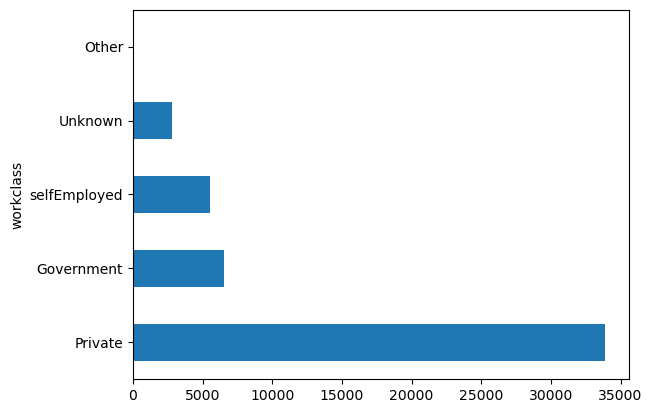

In [68]:
df2['workclass'].value_counts().plot(kind='barh')
print(df2.groupby(['workclass', 'income']).size().unstack())

income            0     1
education                
Assoc-acdm     1188   413
Assoc-voc      1539   522
Bachelors      4712  3313
Doctorate       163   431
HSgrad        13281  2503
Masters        1198  1459
Prof-school     217   617
Some-college   8815  2063
preHS          6042   366


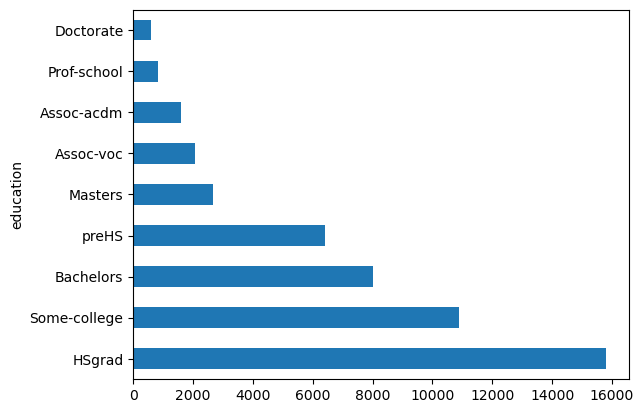

In [69]:
df2['education'].value_counts().plot(kind='barh')
print(df2.groupby(['education', 'income']).size().unstack())

income             0      1
maritalStatus              
Married        12988  10056
Never-married  15384    733
Separated       1431     99
Seperated       5962    671
Widowed         1390    128


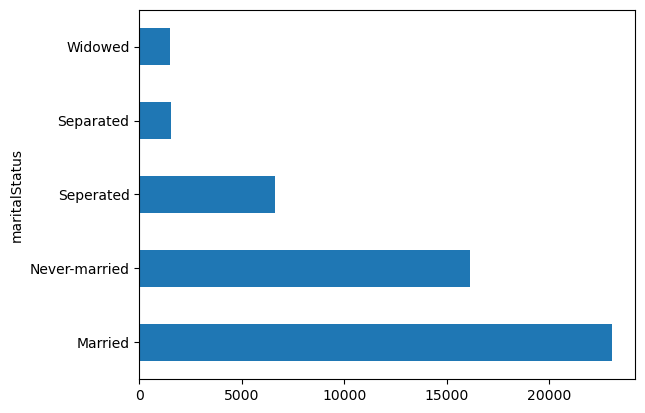

In [70]:
df2['maritalStatus'].value_counts().plot(kind='barh')
print(df2.groupby(['maritalStatus', 'income']).size().unstack())

income                  0      1
race                            
Asian-Pac-Islander   1110    409
Black                4119    566
Other                 771    105
White               31155  10607


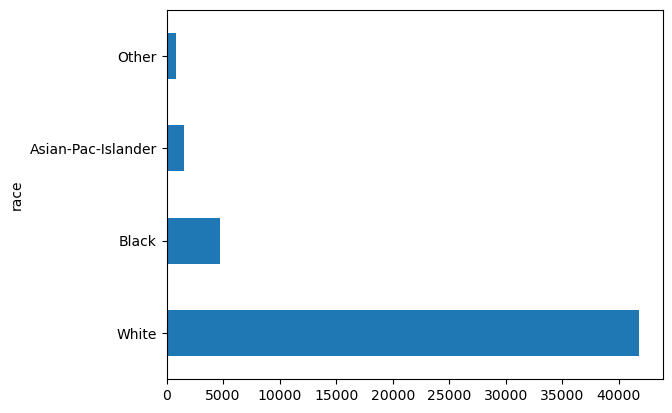

In [71]:
df2['race'].value_counts().plot(kind='barh')
print(df2.groupby(['race', 'income']).size().unstack())

income            0     1
hoursPerWeek             
partTime       4152   301
partTime2     24393  5644
fullTime       7533  5143
fullTime2      1077   599


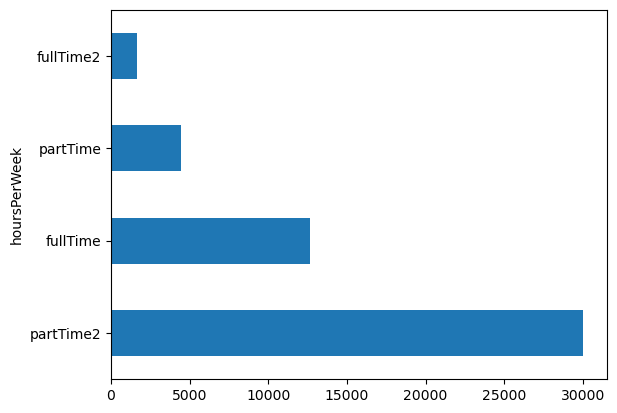

In [72]:
df2['hoursPerWeek'].value_counts().plot(kind='barh')
print(df2.groupby(['hoursPerWeek', 'income']).size().unstack())

### Correlation Between Variables (After Feature Engineering)

First, for each categorical variable, label encoder was used to transform it to an integer.

In [77]:
dtypes = df2.dtypes
print(dtypes)
for x in df2.columns:
    if dtypes[x] == object or dtypes[x] == 'category':
        print("Feature:", x)
        print("String categories:", df2[x].unique())
        label_encoder = preprocessing.LabelEncoder()
        label_encoder.fit(df2[x].unique())
        df2[x] = label_encoder.transform(df2[x])
        print("Int categories:", df2[x].unique())

age              int64
workclass        int32
education        int32
maritalStatus    int32
occupation       int32
race             int32
sex              int32
hoursPerWeek     int32
nativeRegion     int32
income           int64
dtype: object


Testing the correlation between variables

<Axes: >

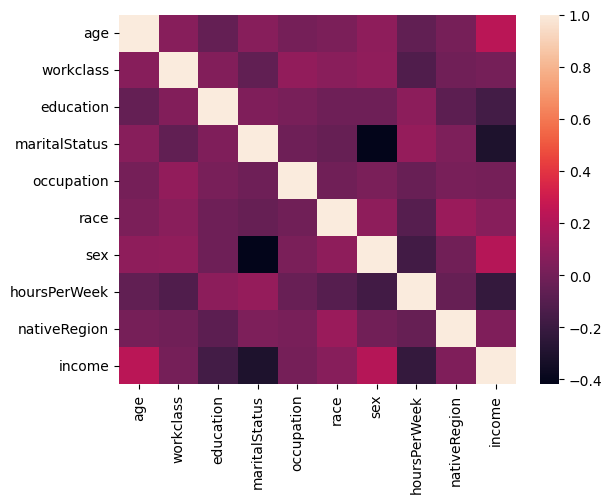

In [78]:
sns.heatmap(df2.corr())

Looking at the correlation between sex and marital status, which appears to have a weak correlation. Then, looking at the correlation between features (X) and income (y). The correlation between income category and individual features appears weak.

In [80]:
print(df2.corr()['sex'].sort_values(ascending=False))
print("")
print(df2.corr()['income'].sort_values(ascending=False))

sex              1.000000
income           0.214628
workclass        0.096214
race             0.090594
age              0.088120
occupation       0.021866
nativeRegion    -0.004241
education       -0.014361
hoursPerWeek    -0.173943
maritalStatus   -0.418150
Name: sex, dtype: float64

income           1.000000
age              0.230369
sex              0.214628
race             0.067374
nativeRegion     0.036509
occupation       0.007275
workclass        0.003252
education       -0.164396
hoursPerWeek    -0.220463
maritalStatus   -0.306839
Name: income, dtype: float64


## Modeling (After Feature Engineering)

Split the data into a training and test set, and apply feature scaling using StandardScaler

In [81]:
# Split into training and test sets
X2_1 = df2.iloc[:, :-1].values
y2_1 = df2.iloc[:, -1].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_1, y2_1, train_size=0.8)

# Feature scaling
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

### Logistic Regression

First, investigate which features to add through backward elimination. It seems that all features are important, and none are removed.

In [82]:
df2.columns

Index(['age', 'workclass', 'education', 'maritalStatus', 'occupation', 'race',
       'sex', 'hoursPerWeek', 'nativeRegion', 'income'],
      dtype='object')

In [83]:
f = 'income ~ age + workclass + education + maritalStatus + occupation + \
race + sex + hoursPerWeek + nativeRegion'
model = smf.ols(formula = f, data=df2)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1424.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:16:16   Log-Likelihood:                -22009.
No. Observations:               48842   AIC:                         4.404e+04
Df Residuals:                   48832   BIC:                         4.413e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1960      0.013     14.788

Train the logistic regression model using LogisticRegression from scikitlearn

In [85]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X2_train, y2_train)

LogisticRegression(random_state=0)

Use the model to predict income level on the test set.

In [86]:
y_pred = classifier.predict(X2_test)

Assess model performance on the training set. Although the accuracy is fair (approx. 78.4%), the F1-score is low (approx. 42.8%).

In [87]:
cm = confusion_matrix(y2_test, y_pred)
TP = sum( np.logical_and(y_pred == 1, y2_test == 1) )
TN = sum( np.logical_and(y_pred == 0, y2_test == 0) )
FP = sum( np.logical_and(y_pred == 1, y2_test == 0) )
FN = sum( np.logical_and(y_pred == 0, y2_test == 1) )

print(cm)
print("Numer of TP: " + str(TP))
print("Numer of TN: " + str(TN))
print("Numer of FP: " + str(FP))
print("Numer of FN: " + str(FN))

[[6867  583]
 [1529  790]]
Numer of TP: 790
Numer of TN: 6867
Numer of FP: 583
Numer of FN: 1529


In [88]:
acc_score = accuracy_score(y_true = y2_test, y_pred = y_pred)
f_score = f1_score(y_true=y2_test, y_pred=y_pred)

print("Accuracy score: " + str(acc_score))
print("F1 score: " + str(f_score))

Accuracy score: 0.7838059166751971
F1 score: 0.4279523293607801


### K-Nearest Neighbors

Use grid search to create kNN models with different number of neighbors. Then, fit the models on the previously defined training set.

In [90]:
param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 50]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), \
                    param_grid = param_grid, \
                    scoring = "accuracy")
grid_search_knn.fit(X2_train, y2_train)

print("Best Estimator values:", grid_search_knn.best_estimator_)
print('Best Score:', np.abs(grid_search_knn.best_score_))

Best Estimator values: KNeighborsClassifier(n_neighbors=10)
Best Score: 0.8141941109686979


Train the model using the parameter settings resulting the best score identified from the grid search.

In [93]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X2_train, y2_train)
y_pred = model_knn.predict(X2_test)

Assess model performance on the test set. The accuracy of the model is fair (approx. 82.0%), and the F1-score is low (approx. 56.2%) but significantly higher as compared to the f1-score of logistic regression.

In [94]:
cm = confusion_matrix(y2_test, y_pred)
TP = sum( np.logical_and(y_pred == 1, y2_test == 1) )
TN = sum( np.logical_and(y_pred == 0, y2_test == 0) )
FP = sum( np.logical_and(y_pred == 1, y2_test == 0) )
FN = sum( np.logical_and(y_pred == 0, y2_test == 1) )

print(cm)
print("Numer of TP: " + str(TP))
print("Numer of TN: " + str(TN))
print("Numer of FP: " + str(FP))
print("Numer of FN: " + str(FN))

[[6877  573]
 [1189 1130]]
Numer of TP: 1130
Numer of TN: 6877
Numer of FP: 573
Numer of FN: 1189


In [95]:
acc_score = accuracy_score(y_true = y2_test, y_pred = y_pred)
f_score = f1_score(y_true=y2_test, y_pred=y_pred)

print("Accuracy score: " + str(acc_score))
print("F1 score: " + str(f_score))

Accuracy score: 0.8196335346504248
F1 score: 0.5619094977623071


### Random Forest

Use grid search to create random forest models across a range of key parameter settings. Then, fit the models on the previously defined training set.

In [92]:
param_grid = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5, 10, 15, 20, 50],
              'min_samples_split' : [2, 3, 5, 10, 15, 25]
             }
grid_search_forest = GridSearchCV(RandomForestClassifier(), \
                    param_grid = param_grid, \
                    scoring = "accuracy")

grid_search_forest.fit(X2_train, y2_train)

print("Best Estimator values:", grid_search_forest.best_estimator_)
print('Best Score:', np.abs(grid_search_forest.best_score_))

Best Estimator values: RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=50,
                       min_samples_split=10)
Best Score: 0.8305735837426826


Use the model to predict income level on the test set.

In [100]:
model_forest = RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=50,
                       min_samples_split=10)
model_forest.fit(X2_train, y2_train)
y_pred = model_forest.predict(X2_test)

Assess model performance on the test set. The accuracy of the model is good (approx. 83.0%), and the F1-score is low (approx. 59.0%) but significantly higher as compared to the f1-score of logistic regression.

In [101]:
cm = confusion_matrix(y2_test, y_pred)
TP = sum( np.logical_and(y_pred == 1, y2_test == 1) )
TN = sum( np.logical_and(y_pred == 0, y2_test == 0) )
FP = sum( np.logical_and(y_pred == 1, y2_test == 0) )
FN = sum( np.logical_and(y_pred == 0, y2_test == 1) )

print(cm)
print("Numer of TP: " + str(TP))
print("Numer of TN: " + str(TN))
print("Numer of FP: " + str(FP))
print("Numer of FN: " + str(FN))

[[6908  542]
 [1121 1198]]
Numer of TP: 1198
Numer of TN: 6908
Numer of FP: 542
Numer of FN: 1121


In [102]:
acc_score = accuracy_score(y_true = y2_test, y_pred = y_pred)
f_score = f1_score(y_true=y2_test, y_pred=y_pred)

print("Accuracy score: " + str(acc_score))
print("F1 score: " + str(f_score))

Accuracy score: 0.8297676323062749
F1 score: 0.5902931756590293


## Results (after Feature Engineering)

Model Selection and Performance

The logistic regression model included all features based on backward elimination. The performance of the model was as follows:
Accuracy score: 0.7838059166751971 <br>
F1 score: 0.4279523293607801

The best kNN model had the the following parameter settings: n_neighbors = 10. The performance of the model was as follows:
Accuracy score: 0.8196335346504248 <br>
F1 score: 0.5619094977623071

The best random forest model had the following parameter settings: criterion='entropy', max_depth=9, max_leaf_nodes=50, and min_samples_split=10. The performance of the model was as follows:
Accuracy score: 0.8297676323062749 <br>
F1 score: 0.5902931756590293

### Summary of Findings

Feature engineering was used to reduce the number of features included in the dataset and reduce the number of categories for certain features. Both kNN and random forest significantly outperformed logistic regression. As compared to KNN, the random forest model had better accuracy and F1-score. As expected, model performance decreased after feature engineering due to a loss of information. However, feature engineering represented an important step in model building in order to better represent the type of information that may be captured and included in these models in a real world setting.

## Discussion/Conclusion

Before feature engineering, the kNN model performed the best in terms of F1 score (61.4%) and had fair accuracy (83.5%). The low F1-score was primarily driven by a low recall (55.2%) but, in this case, an argument may be made that the precision of the model (69.1%) may be more important. For instance, imagine applications where the intent is to reach out to higher income individuals but that a cost may be associated with such an activity. In such a case, precision may be considered highly important as it measures the ratio of true positive among all positive cases identified by the model (TP + FP).

The original dataset was comprised of Census data. In the real world, access to all of the information within the dataset may not be feasible. As such, feature engineering was performed in order to focus on features that may be available in the real world and to reduce the number of categories contained within certain features. After feature engineering, the random forest model performed best in terms of both accuracy (83.0%) and F1-score (59.0%). The low F1-score was primarily due to a low recall (51.7%) but the precision (68.9%) was higher. As previously discussed, precission may be of higher importance for certain applications of the model.

Further improvements to the model may be possible by incorporating additional features that may be available in the real world that may provide additional information on the income category of an individual. In addition, the use of other machine learning algorithms such as neural networks could improve model performance.
